# Pymaceuticals Inc. Analysis


## Data Preparation

In [1]:
# import tools 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# load mouse meta data
mouse_metadata_df = pd.read_csv("Mouse_metadata.csv")
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# check missing data in mouse_metadata
mouse_metadata_df.count()
# mouse_metadata_df.dtypes

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [4]:
# check total mouse from mouse_metadata
print(len(mouse_metadata_df["Mouse ID"]))

249


In [5]:
# load study data
study_results_df = pd.read_csv("Study_results.csv")
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# check missing data in study_results
study_results_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
# merge two data files
merged_data = pd.merge(mouse_metadata_df, study_results_df, on= ["Mouse ID", "Mouse ID"])
merged_data
# merged_data.dtypes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# count mice based on Mouse Id from merged data
mouse_counts = len(merged_data["Mouse ID"].unique())
mouse_counts

249

In [9]:
# this is to perform overall check on the duplicate rows based on Mouse ID and Timepoint
df1 = merged_data.loc[merged_data[["Mouse ID", "Timepoint"]].duplicated()]["Mouse ID"].unique()
df1

array(['g989'], dtype=object)

In [10]:
# this is just to see the duplicate rows for Mouse g989 at Timepoint
df = merged_data.loc[merged_data[["Mouse ID", "Timepoint"]].duplicated()]
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# filter to just see Mouse ID = g989 using .loc syntax
df2= merged_data.loc[merged_data["Mouse ID"]== "g989"]
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# drop Mouse ID == g989
new_merged_data=merged_data[merged_data["Mouse ID"] !="g989"]
new_merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# checking the number of mice in new_merged_data after removing duplicate mouse, g989.
mice= len(new_merged_data["Mouse ID"].unique())
mice

248

## Summary Statistics

In [14]:
# use aggregation method to perform summary statistics on Tumor Volume
new_merged_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','std','var','sem']})

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Create Bar Charts and Pie Charts

### Bar Charts of Timepoints for Each Drug Regimen

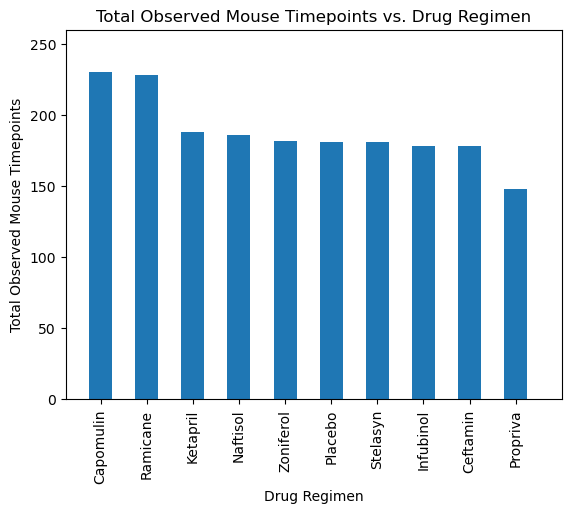

In [15]:
# use Pandas to plot
new_merged_data["Drug Regimen"].value_counts().plot(kind="bar",
                                                    title="Total Observed Mouse Timepoints vs. Drug Regimen",
                                                   ylabel="Total Observed Mouse Timepoints",
                                                   xlabel="Drug Regimen")
# Set x and y limits
plt.xlim(-0.75, len(new_merged_data["Drug Regimen"].unique()))
plt.ylim(0, max(new_merged_data["Drug Regimen"].value_counts()) +30)
plt.show()

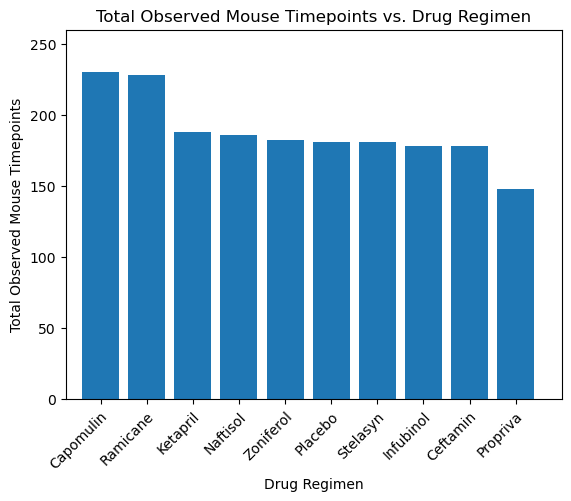

In [16]:
# use Matplotlib
a= new_merged_data["Drug Regimen"].value_counts()
fig=plt.bar(a.index.values,a.values)

# Set a Title and labels
plt.title("Total Observed Mouse Timepoints vs. Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Observed Mouse Timepoints")
plt.xticks(rotation = 45, rotation_mode='anchor',ha='right', wrap=True)

# Set x and y limits
plt.xlim(-0.75, len(new_merged_data["Drug Regimen"].unique()))
plt.ylim(0, max(new_merged_data["Drug Regimen"].value_counts()) +30)

plt.show()

### Pie Plot of Distribution of Female versus Male mice

<Axes: title={'center': 'Female and Male Mice Distribution in Experiment'}, ylabel='Sex'>

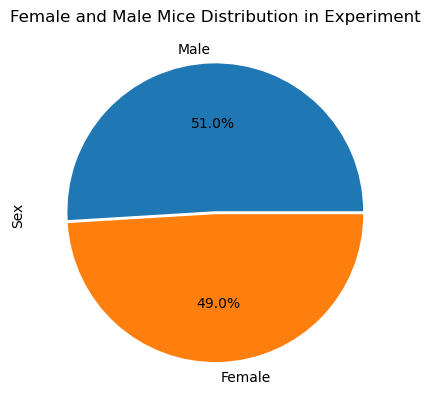

In [17]:
# use Pandas to plot
new_merged_data["Sex"].value_counts().plot(kind="pie", title="Female and Male Mice Distribution in Experiment",
                                           autopct="%1.1f%%", explode=(0.02, 0))                                        

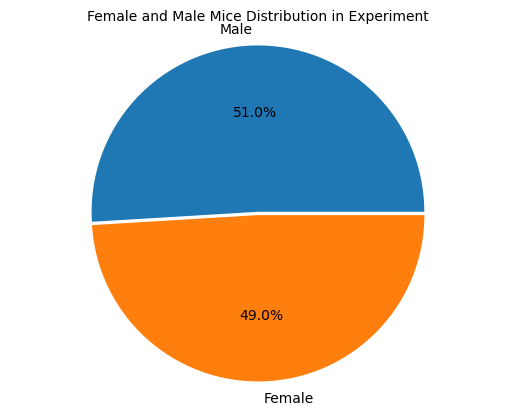

In [18]:
# use Matplotlib to create pie chart
sex= new_merged_data["Sex"].value_counts()
labels= sex.index.values
plt.pie(sex,explode=(0.02,0),labels=labels,
         autopct="%1.1f%%")
plt.title("Female and Male Mice Distribution in Experiment", fontsize=10)
plt.axis("equal")            
plt.show() 

## Quartiles, Outliers, Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse, 
# Using groupby to look up max timepoint for drug regimen and mouse ID
final_tumor_mice_df=new_merged_data.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max()
final_tumor_mice_df                 

Drug Regimen  Mouse ID
Capomulin     b128        45
              b742        45
              f966        20
              g288        45
              g316        45
                          ..
Zoniferol     q633        45
              s337        45
              w140         5
              w575        45
              x613        15
Name: Timepoint, Length: 248, dtype: int64

In [20]:
# Merge final_tumor_mice_df (this data frame) with new_merged_data (original cleaned dataframe) to get final Tumor Volume
final_merge_df= pd.merge(final_tumor_mice_df, new_merged_data, on=["Drug Regimen", "Mouse ID"])

# Rename Timepoint_x to Timepoint_max and Timepoint_y to Timepoint
rename_df=final_merge_df.rename(columns={'Timepoint_x':'Timepoint_max', 'Timepoint_y':'Timepoint'})
rename_df  

,Drug Regimen,Mouse ID,Timepoint_max,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,0,45.000000,0
1,Capomulin,b128,45,Female,9,22,5,45.651331,0
2,Capomulin,b128,45,Female,9,22,10,43.270852,0
3,Capomulin,b128,45,Female,9,22,15,43.784893,0
4,Capomulin,b128,45,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...,...
1875,Zoniferol,w575,45,Female,16,28,45,68.401286,3
1876,Zoniferol,x613,15,Female,2,29,0,45.000000,0
1877,Zoniferol,x613,15,Female,2,29,5,46.097041,0
1878,Zoniferol,x613,15,Female,2,29,10,46.818176,0


In [21]:
# Get the final Tumor Volume at the latest Timepoint, (TimePoint_max) by having Timepoint_max = Time point
max_tumor_v = rename_df[(rename_df['Timepoint_max']==rename_df['Timepoint'])]
max_tumor_v

,Drug Regimen,Mouse ID,Timepoint_max,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,Capomulin,b128,45,Female,9,22,45,38.982878,2
19,Capomulin,b742,45,Male,7,21,45,38.939633,0
24,Capomulin,f966,20,Male,16,17,20,30.485985,0
34,Capomulin,g288,45,Male,3,19,45,37.074024,1
44,Capomulin,g316,45,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...,...
1853,Zoniferol,q633,45,Male,12,25,45,70.827796,2
1863,Zoniferol,s337,45,Male,14,27,45,62.109651,4
1865,Zoniferol,w140,5,Female,19,30,5,47.717952,0
1875,Zoniferol,w575,45,Female,16,28,45,68.401286,3


In [22]:
# Select these four Drug Regimen to analyze, Capomulin, Ramicane, Infubinol, and Ceftamin and reset index
drug_max_tumor= max_tumor_v.loc[max_tumor_v['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
drug_max_tumor_ = drug_max_tumor.reset_index(drop=True)
drug_max_tumor_

,Drug Regimen,Mouse ID,Timepoint_max,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,45,38.982878,2
1,Capomulin,b742,45,Male,7,21,45,38.939633,0
2,Capomulin,f966,20,Male,16,17,20,30.485985,0
3,Capomulin,g288,45,Male,3,19,45,37.074024,1
4,Capomulin,g316,45,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,Male,1,17,45,30.276232,0
96,Ramicane,u196,45,Male,18,25,45,40.667713,3
97,Ramicane,w678,5,Female,5,24,5,43.166373,0
98,Ramicane,y449,15,Male,19,24,15,44.183451,0


Lower quartile of final tumor volume : 32.37735684 for Capomulin
Upper quartile of final tumor volume : 40.1592203 for Capomulin
Lower quartile of final tumor volume : 48.72207785 for Ceftamin
Upper quartile of final tumor volume : 64.29983003 for Ceftamin
Lower quartile of final tumor volume : 54.04860769 for Infubinol
Upper quartile of final tumor volume : 65.52574285 for Infubinol
Lower quartile of final tumor volume : 31.56046955 for Ramicane
Upper quartile of final tumor volume : 40.65900627 for Ramicane


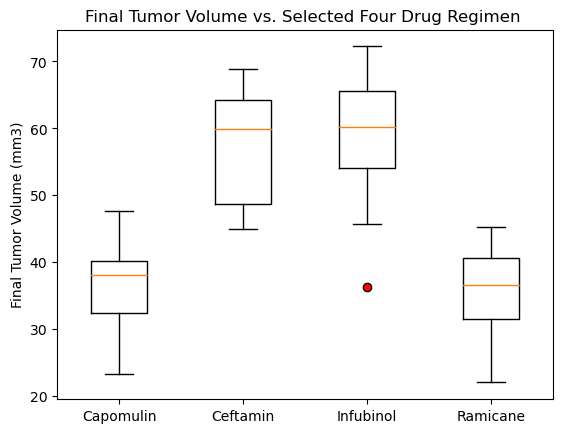

In [23]:
# Create drug list for for-loop
drug_list =drug_max_tumor_['Drug Regimen'].unique()

# make a new variable to append final tumor volume from drug_max_tumor
tumor_volume_list = []

# start for loop to calculate IQR and generate data for box plots
for drug in drug_list:
    final_tumor_volume= drug_max_tumor_.loc[drug_max_tumor_["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_volume_list.append(final_tumor_volume)

# Calculate IQR 
    quartiles= final_tumor_volume.quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr=upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower quartile of final tumor volume : {lowerq} for {drug}")
    print(f"Upper quartile of final tumor volume : {upperq} for {drug}")

# Create Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume vs. Selected Four Drug Regimen ')
ax1.set_ylabel('Final Tumor Volume (mm3)')
# Generate boxplot and highlighted outlier(s) in red.
ax1.boxplot(tumor_volume_list, labels=drug_list, flierprops=dict(markerfacecolor='r'))
plt.show()

## Create a Line Plot and a Scatter Plot

In [24]:
# Generate a line plot for tumor volume vs time point for a single mouse treated with capomulin
Capo_tumor= new_merged_data.loc[new_merged_data['Drug Regimen'].isin(['Capomulin'])]
Capo_tumor_ = Capo_tumor.reset_index(drop=True)

# select Mouse ID, s185
s185_Capo_tumor =Capo_tumor_[Capo_tumor_["Mouse ID"] =="s185"]
s185_Capo_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
5,s185,Capomulin,Female,3,17,25,33.949940,0
6,s185,Capomulin,Female,3,17,30,32.959671,1
7,s185,Capomulin,Female,3,17,35,28.328531,1
8,s185,Capomulin,Female,3,17,40,25.472143,1
9,s185,Capomulin,Female,3,17,45,23.343598,1


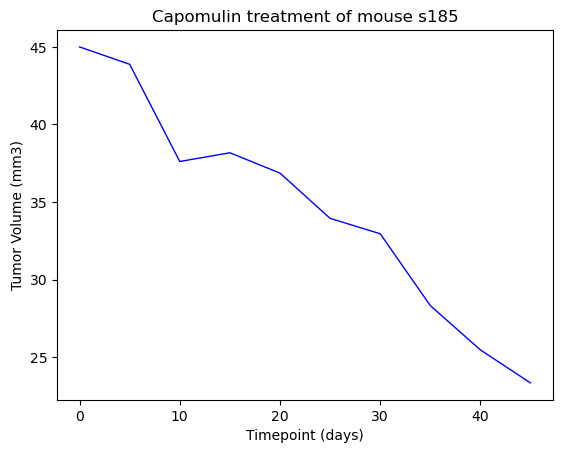

In [25]:
# Generate line plot for tumor volume vs time point for a mouse "s185" treated with capomulin
plt.plot(s185_Capo_tumor['Timepoint'], s185_Capo_tumor['Tumor Volume (mm3)'], color="blue", linewidth=1)
plt.title('Capomulin treatment of mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# first generate average tumor volume per each weight category
# copy file from Capo_tumor dataframe and then calculate average tumor volume based on Capomulin drug regimen by Mouse ID
copy_capo= Capo_tumor_.copy()
mean_weight= copy_capo.groupby(['Weight (g)','Mouse ID'])['Tumor Volume (mm3)'].mean()
mean_weight

Weight (g)  Mouse ID
15          x401        36.182040
17          f966        36.505973
            m601        34.847470
            r554        36.509212
            s185        34.559143
            t565        39.328725
            u364        39.887495
            y793        38.506829
19          g288        41.990097
            l897        42.507261
            m957        39.049816
20          i738        39.141053
21          b742        40.083699
            j246        43.216925
            l509        44.434474
            v923        41.581595
            w914        41.352452
22          b128        41.963636
            g316        44.613344
23          j119        44.465236
            s710        42.803733
            w150        41.384825
24          i557        44.805810
25          r157        45.798970
            r944        43.367364
Name: Tumor Volume (mm3), dtype: float64

In [27]:
# Merge mean_weight with copy_capo dataframe for scatter plot
scatter_df= pd.merge(mean_weight, copy_capo, on=['Weight (g)' , 'Weight (g)'])
scatter_df

,Weight (g),Tumor Volume (mm3)_x,Mouse ID,Drug Regimen,Sex,Age_months,Timepoint,Tumor Volume (mm3)_y,Metastatic Sites
0,15,36.182040,x401,Capomulin,Female,16,0,45.000000,0
1,15,36.182040,x401,Capomulin,Female,16,5,45.473753,0
2,15,36.182040,x401,Capomulin,Female,16,10,39.113891,0
3,15,36.182040,x401,Capomulin,Female,16,15,39.776250,0
4,15,36.182040,x401,Capomulin,Female,16,20,36.065835,0
...,...,...,...,...,...,...,...,...,...
947,25,43.367364,r944,Capomulin,Male,12,45,41.581521,2
948,25,43.367364,r157,Capomulin,Male,22,0,45.000000,0
949,25,43.367364,r157,Capomulin,Male,22,5,45.597064,0
950,25,43.367364,r157,Capomulin,Male,22,10,46.059608,0


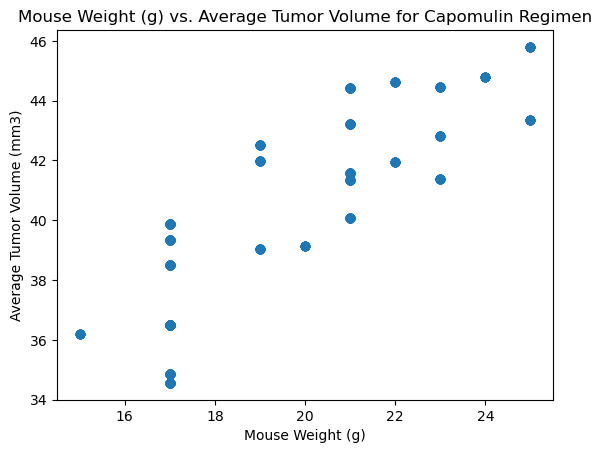

In [28]:
# Create scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen by Mouse ID
x_values= scatter_df['Weight (g)']
y_values=scatter_df ['Tumor Volume (mm3)_x']
plt.scatter(x_values, y_values)
plt.title('Mouse Weight (g) vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Calculate Correlation and Regression

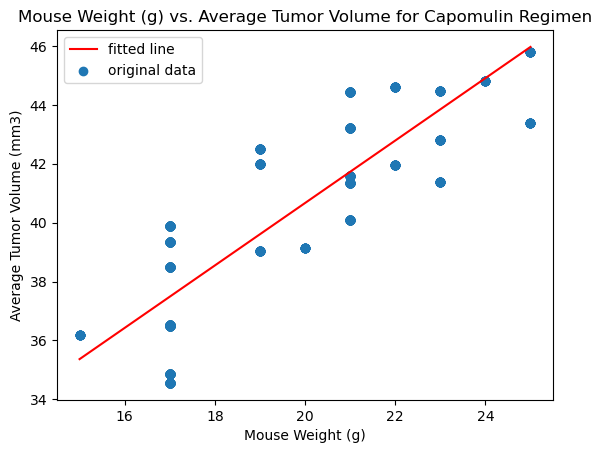

R-squared: 0.664405
p-value: 0.000000
stderr: 0.024438


In [29]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Linear regression equation and line to plot
x_values= scatter_df['Weight (g)']
y_values=scatter_df ['Tumor Volume (mm3)_x']
# Get slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot linear regression line
plt.plot(x_values,regress_values,"r-" , label ='fitted line')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# create scatter plot
plt.scatter(x_values, y_values, label='original data')
plt.title('Mouse Weight (g) vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()
print(f"R-squared: {rvalue**2:.6f}")
print(f"p-value: {pvalue:.6f}")
print(f"stderr: {stderr:.6f}")